In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('projet1_data.csv')
data.head()

,Unnamed: 0,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,7,2.015561e+12,dizzy & double vision past 45 mins after CT,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,SYMPTOMS,No,2015_5_6141_1001
1,14,2.015562e+12,pt clld to check on a work in appt,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6153_1001
2,17,2.015562e+12,SCHEDULED,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6156_1001
3,18,2.015562e+12,Last office note faxed to NCEENT,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6158_1001
4,21,2.015562e+12,PCP Call - pt had concussion,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6162_1001


# 1. Nettoyage des données :

a. Supprimer les colonnes indésirables field_id et DATA et garder les colonnes -
"summary","categories","sub_categories","previous_appointment","id".

In [3]:
data = data.drop(['fileid', 'DATA', 'Unnamed: 0'], axis=1)

In [4]:
data.head()

,SUMMARY,categories,sub_categories,previous_appointment,ID
0,dizzy & double vision past 45 mins after CT,ASK_A_DOCTOR,SYMPTOMS,No,2015_5_6141_1001
1,pt clld to check on a work in appt,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6153_1001
2,SCHEDULED,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6156_1001
3,Last office note faxed to NCEENT,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6158_1001
4,PCP Call - pt had concussion,MISCELLANEOUS,OTHERS,No,2015_5_6162_1001


b. Supprimer la catégorie et la sous-catégorie indésirables Junk :

In [5]:
data.categories.unique()

array(['ASK_A_DOCTOR', 'APPOINTMENTS', 'MISCELLANEOUS', 'PRESCRIPTION',
       'LAB', 'mISCELLANEOUS', 'JUNK', 'asK_A_DOCTOR'], dtype=object)

In [6]:
data.sub_categories.unique()

array(['SYMPTOMS', 'NEW APPOINTMENT',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 'OTHERS',
       'REFILL', 'PROVIDER', 'CANCELLATION', 'LAB RESULTS',
       'MEDICATION RELATED', 'QUERIES FROM PHARMACY',
       'PRIOR AUTHORIZATION', 'CHANGE OF PROVIDER',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'QUERIES FROM INSURANCE FIRM', 'RESCHEDULING',
       'FOLLOW UP ON PREVIOUS REQUEST', 'CHANGE OF PHARMACY',
       'QUERY ON CURRENT APPOINTMENT', 'RUNNING LATE TO APPOINTMENT',
       'CHANGE OF HOSPITAL', 'JUNK', 'mEDICATION RELATED'], dtype=object)

In [7]:
data.drop(data.loc[data['categories']=='JUNK'].index, inplace=True)
data.drop(data.loc[data['sub_categories']=='JUNK'].index, inplace=True)

c. Modifier les catégories et sous-catégories en minuscules puis supprimer les doublons.

In [8]:
data['categories'] = data['categories'].apply(lambda x:x.lower())
data['sub_categories'] = data['sub_categories'].apply(lambda x:x.lower())

In [9]:
data.drop_duplicates(keep = 'first', inplace=True)

In [10]:
data.head()

,SUMMARY,categories,sub_categories,previous_appointment,ID
0,dizzy & double vision past 45 mins after CT,ask_a_doctor,symptoms,No,2015_5_6141_1001
1,pt clld to check on a work in appt,appointments,new appointment,No,2015_5_6153_1001
2,SCHEDULED,appointments,new appointment,No,2015_5_6156_1001
3,Last office note faxed to NCEENT,miscellaneous,"sharing of health records (fax, e-mail, etc.)",No,2015_5_6158_1001
4,PCP Call - pt had concussion,miscellaneous,others,No,2015_5_6162_1001


d. Analyser les données pour trouver les valeurs manquantes. Si une valeur manquante est
trouvée, les lignes correspondantes sont supprimées.

In [11]:
data.isnull().sum()

SUMMARY                 712
categories                0
sub_categories            0
previous_appointment      0
ID                        0
dtype: int64

In [12]:
data = data.dropna()

e. Écrivez une fonction nommée clean_text qui prend une chaîne contenant du texte et renvoie
une version nettoyée en la mettant entièrement en minuscule, en supprimant tous les espaces
du début ou de la fin et en supprimant tous les caractères qui ne sont ni des espaces ni des
caractères alphabétiques.

In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-z\s]', '', text)
    text = text.strip()
    text = re.sub(" +", " ", text)
    return text

f. Appeler clean_text(' This "1" wasn`t BAD!!!! ') pour vérifier que votre fonction
fonctionne correctement.

In [32]:
clean_text(' This "1" wasn`t BAD!!!! ')

'this wasn`t bad'

# 2. Compréhension des données :

g. Tracer la proportion de catégories et de sous-catégories dans l'ensemble de données.

In [38]:
data.categories.unique()

array(['ask_a_doctor', 'appointments', 'miscellaneous', 'prescription',
       'lab'], dtype=object)

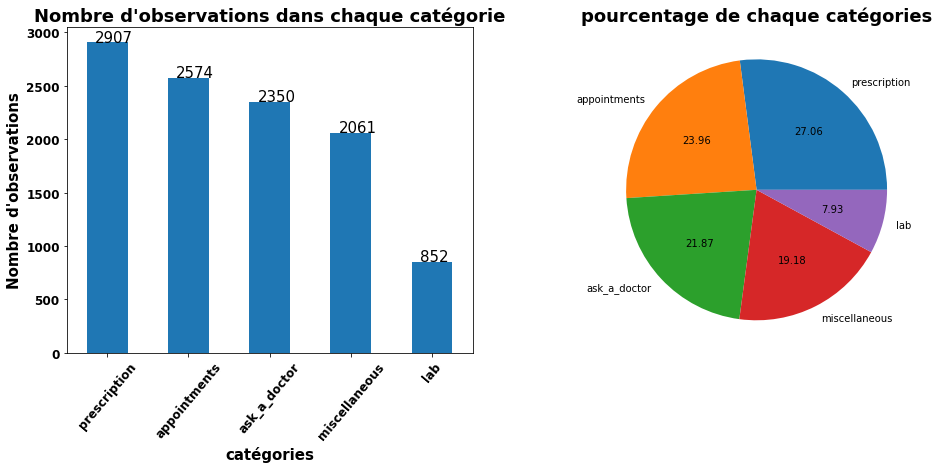

In [48]:
plt.subplots(1,2, figsize=(16,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = data['categories'].value_counts().plot(kind='bar')
plt.xlabel('catégories', fontsize=15, fontweight='bold')
plt.xticks(rotation=50, fontsize=12, fontweight='bold')
plt.ylabel("Nombre d'observations", fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Nombre d'observations dans chaque catégorie", fontsize=18, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(data['categories'].value_counts(), labels=['prescription', 'appointments', 'ask_a_doctor', 'miscellaneous',
       'lab'], autopct='%.2f')
plt.title('pourcentage de chaque catégories', fontsize=18, fontweight='bold')

# display plot
plt.show()

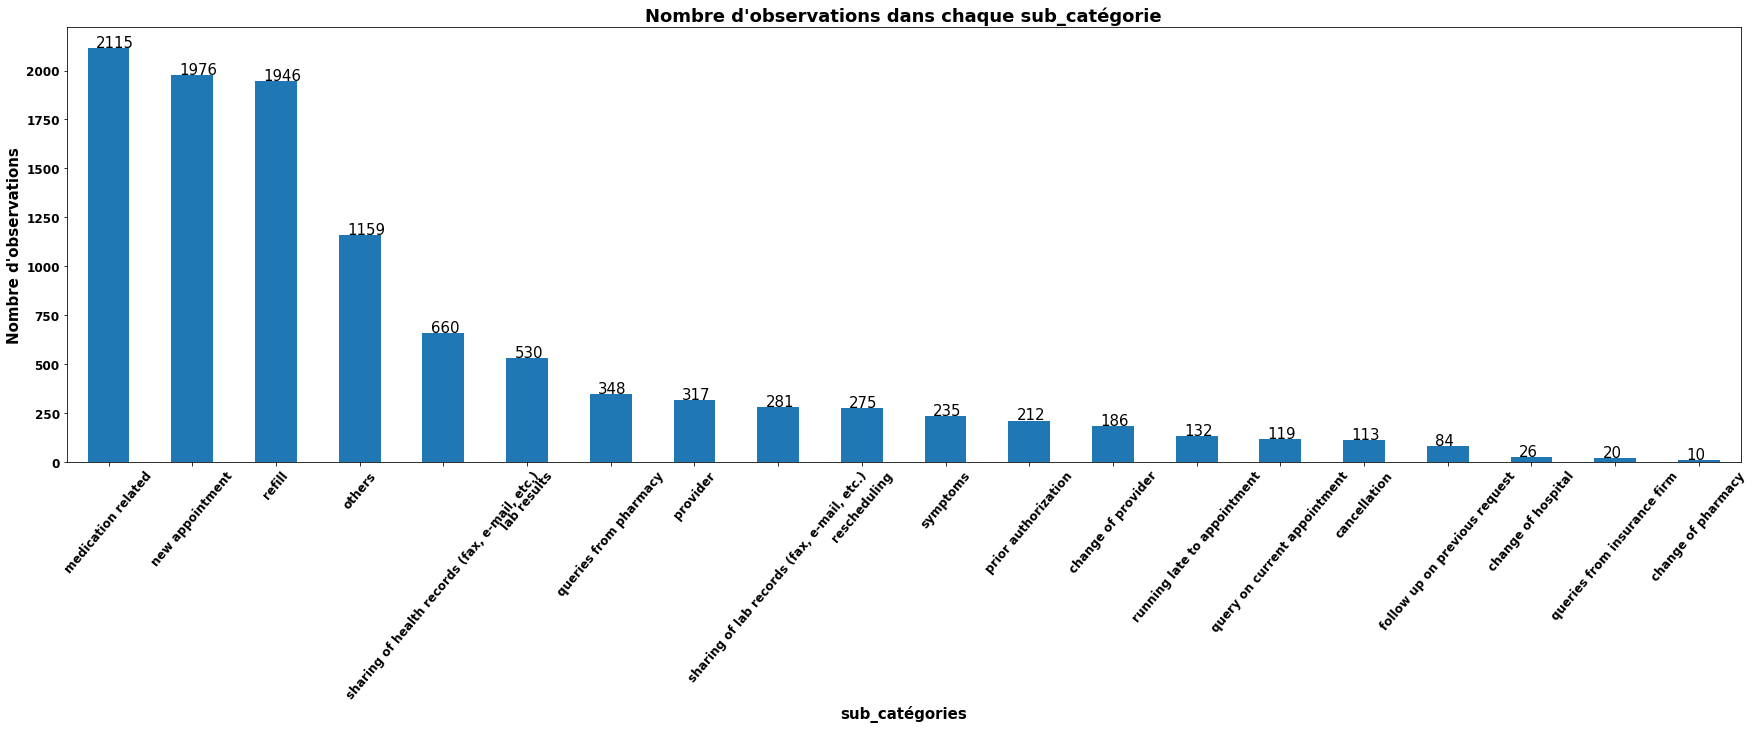

In [62]:
plt.subplots(figsize=(30,8))
# countplot to visualize the no. of observations under each class
ax = data['sub_categories'].value_counts().plot(kind='bar')
plt.xlabel('sub_catégories', fontsize=15, fontweight='bold')
plt.xticks(rotation=50, fontsize=12, fontweight='bold')
plt.ylabel("Nombre d'observations", fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Nombre d'observations dans chaque sub_catégorie", fontsize=18, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

# display plot
plt.show()

Text(0.5, 1.0, 'pourcentage de chaque sub_catégories')

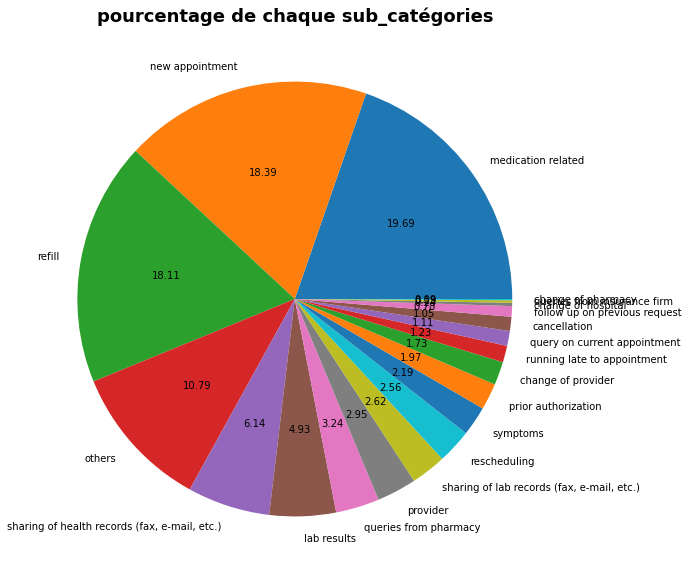

In [76]:
plt.subplots(figsize=(30,10))
# pie chart to visualize the percentage distribution of each class
plt.pie(data['sub_categories'].value_counts(), labels=['medication related', 'new appointment','refill','others',
                                                       'sharing of health records (fax, e-mail, etc.)','lab results',
                                                       'queries from pharmacy','provider','sharing of lab records (fax, e-mail, etc.)',
                                                       'rescheduling','symptoms','prior authorization','change of provider',
                                                       'running late to appointment','query on current appointment',
                                                       'cancellation','follow up on previous request','change of hospital',
                                                       'queries from insurance firm','change of pharmacy'], autopct='%.2f')
plt.title('pourcentage de chaque sub_catégories', fontsize=18, fontweight='bold')

h. Trouver les mots fréquents et tracer l'histogramme en fonction du nombre de mots dans
chaque catégorie.

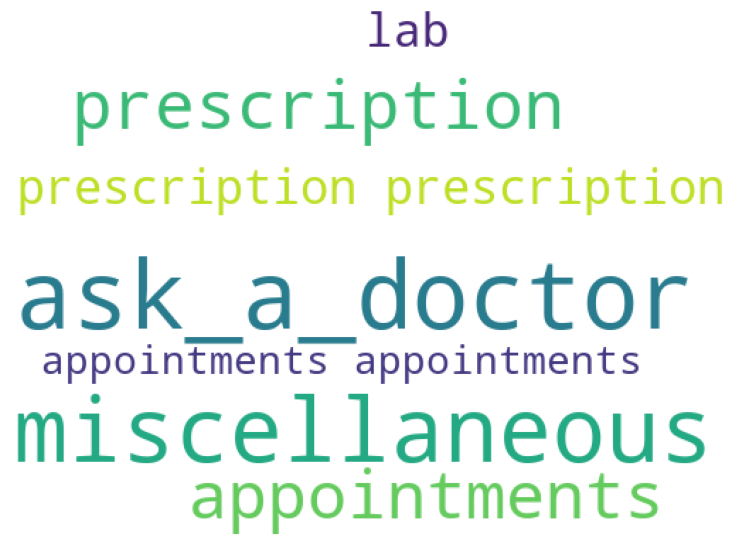

In [79]:
from wordcloud import WordCloud
from scipy import signal

cities = data.categories.dropna(False)
plt.subplots(figsize=(20,10))

wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()